### Data Augmentation with Albumentations

#### 1. For Classification

In [1]:
import albumentations as A        # For data augmentation
import cv2                        # For loading images
import matplotlib.pyplot as plt   # For plotting images

In [2]:
# making a function to load the image
def load_img(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [3]:
# load the image
image = load_img('resources/bird.jpg')
image.shape

(3335, 5000, 3)

In [4]:
transform = A.Compose([
    A.Blur(blur_limit=(70, 70), p=1)
])

In [5]:
transformed_img = transform(image=image)['image']
transformed_img.shape

(3335, 5000, 3)

In [6]:
def comparison(actual_image, transformed_image, titles=None):
    if titles == None:
        titles = ['Actual Image', 'Transformed Image']
        
    fig, ax = plt.subplots(1, 2, figsize=(11, 17))
    ax[0].set_title(titles[0])
    if len(actual_image.shape) == 2:
        ax[0].imshow(actual_image, cmap='gray')
    else:
        ax[0].matshow(actual_image)
    ax[0].axis('off')

    ax[1].set_title(titles[1])
    if len(transformed_image.shape) == 2:
        ax[1].imshow(transformed_image, cmap='gray')
    else:
        ax[1].matshow(transformed_image)
    ax[1].axis('off')
    plt.show()

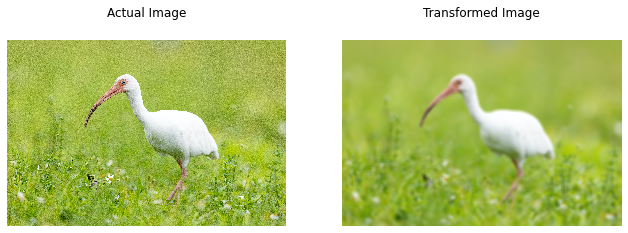

In [7]:
comparison(image, transformed_img)

### Multiple Transformations

In [8]:
transform = A.Compose([
    A.Resize(512, 512),
    A.RandomBrightnessContrast(p=1.),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5)
])

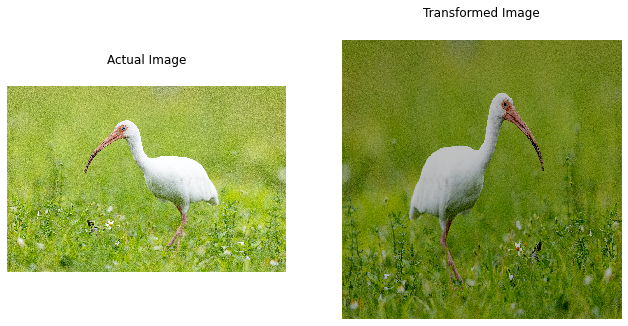

In [9]:
transformed_img = transform(image=image)['image']
comparison(image, transformed_img)

#### 2. For Image Segmentation

In [10]:
image = load_img('resources/building.jpg')
mask = cv2.imread('resources/building_mask.tif', cv2.IMREAD_GRAYSCALE)
print(image.shape, mask.shape)

(5000, 5000, 3) (5000, 5000)


In [11]:
transformed = transform(image=image, mask=mask)

In [12]:
transformed_img = transformed['image']
transformed_mask = transformed['mask']

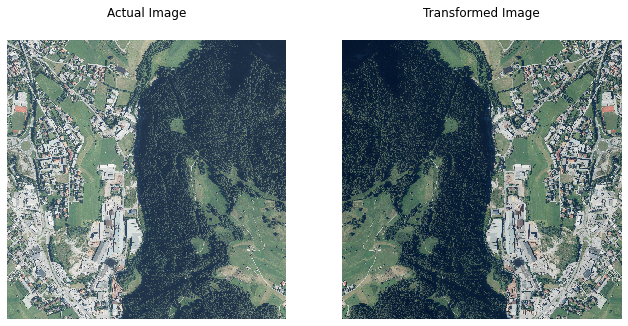

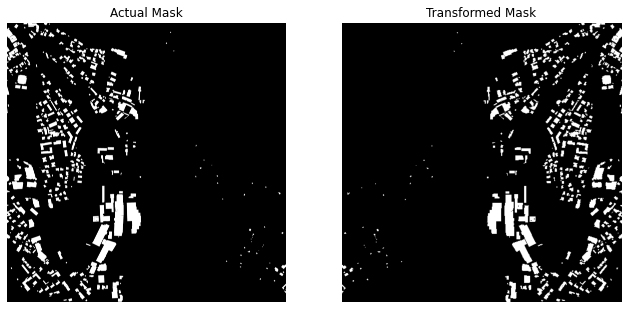

In [13]:
comparison(image, transformed_img)
comparison(mask, transformed_mask, titles=['Actual Mask', 'Transformed Mask'])

#### 3. For Object Detection 